# Financial Analysis using Nasdaq Data Link API
[The Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/in-depth-usage-1) provides a gateway to a wide range of financial data sets, including comprehensive metrics on various companies. We will focus on the [MER/F1 data table](https://data.nasdaq.com/databases/MF1), which contains detailed financial information such as balance sheets, cash flow statements, and income statements. We will extract financial data for a specific set of companies, with an emphasis on understanding their financial performance over time. We'll examine metrics like Accrued Expenses Turnover and explore how these values differ among companies, regions and industries.

Three primary goals:

- To analyze the financial trend of 'accrued expenses turnover' over a period for various companies
- To examine how different regions contribute to this financial metric.
- Compare how different industries fare against each other in terms of this metric

$Accrued Expenses Turnover= Annualized Revenue / Average Accrued Expenses$

"Accrued Expenses Turnover" is a key financial efficiency ratio. It measures how often a company pays off its accrued expenses within a certain period, providing insights into:

- **Cash Flow Management**: It indicates how well a company is managing its cash flow in relation to its short-term obligations. A higher ratio suggests efficient management and a strong liquidity position.
- **Operational Efficiency**: This metric can reflect a company's operational efficiency, showing how promptly it settles its short-term debts.
- **Financial Health Indicator**: Regular payment of accrued expenses signifies good financial health and creditworthiness, which is essential for maintaining good supplier relationships and business stability.

|Column Name|	Description|
|---|---|
|compnumber|	Unique identifier for each company|
|reportid|	ID associated with a specific financial report|
|mapcode|	Code representing a specific financial metric or data point|
|amount|	Numerical value of the financial metric|
|reportdate|	Date of the financial report|
|reporttype|	Type of the report (e.g., Q1, Q2)|
|currency|	Currency in which financial amounts are reported|
|longname|	The name of the bank or company|
|city|	The city to which a given bank or company belong|
|country|	Region to which a given bank or company is situated|
|...  |	...|
|indicator|	Specific financial indicator being reported|
|statement|	Type of financial statement from which the data is derived|

Note: This table is a simplified view focusing on key columns. The actual dataset contains more columns with various data types.




In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import config # API key is stored in this file

In [2]:
# Get api credentials
api_key = config.API_KEY

### Working with the Endpoint and Parameters to Query the API

In [3]:
url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
parameters = {
    'api_key' : api_key,
    'qopts.per_page': 10
}
response = requests.get(url, params=parameters) # this will format the url with params: ?qopts.per_page=10&api_key={api_key}



In [4]:
data = response.json()
print(data)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

### Processing the JSON Data into a DataFrame

In [5]:
col_data = data['datatable']['columns']
print(col_data)

[{'name': 'compnumber', 'type': 'Integer'}, {'name': 'reportid', 'type': 'Integer'}, {'name': 'mapcode', 'type': 'Integer'}, {'name': 'amount', 'type': 'BigDecimal(36,14)'}, {'name': 'reportdate', 'type': 'Date'}, {'name': 'reporttype', 'type': 'String'}, {'name': 'auditorstatus', 'type': 'String'}, {'name': 'currency', 'type': 'String'}, {'name': 'consolidated', 'type': 'String'}, {'name': 'longname', 'type': 'String'}, {'name': 'shortname', 'type': 'String'}, {'name': 'status', 'type': 'String'}, {'name': 'countrycode', 'type': 'String'}, {'name': 'region', 'type': 'String'}, {'name': 'cik', 'type': 'Integer'}, {'name': 'mic', 'type': 'String'}, {'name': 'ticker', 'type': 'String'}, {'name': 'exchange', 'type': 'String'}, {'name': 'address1', 'type': 'String'}, {'name': 'address2', 'type': 'String'}, {'name': 'address3', 'type': 'String'}, {'name': 'address4', 'type': 'String'}, {'name': 'city', 'type': 'String'}, {'name': 'statecode', 'type': 'String'}, {'name': 'country', 'type': '

In [6]:
col_names = [item['name'] for item in col_data]
print(col_names)

['compnumber', 'reportid', 'mapcode', 'amount', 'reportdate', 'reporttype', 'auditorstatus', 'currency', 'consolidated', 'longname', 'shortname', 'status', 'countrycode', 'region', 'cik', 'mic', 'ticker', 'exchange', 'address1', 'address2', 'address3', 'address4', 'city', 'statecode', 'country', 'zipcode', 'phonenumber', 'faxnumber', 'website', 'fye', 'indicator', 'statement']


In [7]:
df = pd.DataFrame(data['datatable']['data'],columns=col_names)
df.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


We an observe from the first row above:
This row indicates that for Deutsche Bank AG, in the second quarter (Q2) of 2011, the Accrued Expenses Turnover ratio was approximately 10.48. This suggests that during this quarter, Deutsche Bank effectively managed its short-term liabilities by cycling through its accrued expenses roughly 10.48 times. A high turnover ratio like this implies efficient management of short-term obligations, provided this figure aligns with industry standards and the company's norms. 

### Getting bulk dataset
Now let's get bulk data of 10000 rows.

In [8]:
parameters = {
    'api_key' : api_key,
    'qopts.per_page': 10000,
}
response = requests.get(url, params=parameters)


In [10]:
data = response.json()
df_metric = pd.DataFrame(data['datatable']['data'],columns=col_names)
df_metric.head()


,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


In [11]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [12]:
df_metric.shape

(10000, 32)

### Indentifying the columns of interest
Recall that we had two primary aims:

- To analyze the financial trend of 'accrued expenses turnover' over a period for various companies, particularly banks.
- To examine how different regions contribute to these financial metrics.

With these aims in mind, the columns in our dataset that will help us achieve these goals are: 

In [13]:
necessary_columns=['amount', 'reportdate', 'reporttype', 'longname', 'status', 'region', 'mic', 'ticker', 'exchange', 'country', 'indicator']

### Filtering the DataFrame for Analysis
Our primary focus is on a specific financial metric—the accrued expenses turnover. So let's filter the data for this metric and necessary columns identified above.

In [14]:
filtered_df = df_metric.loc[df_metric['indicator']=='Accrued Expenses Turnover', necessary_columns]
filtered_df.head()

,amount,reportdate,reporttype,longname,status,region,mic,ticker,exchange,country,indicator
0,10.481948,2011-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,DEU,Accrued Expenses Turnover
1,8.161754,2011-09-30,Q3,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,DEU,Accrued Expenses Turnover
2,10.788213,2012-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,DEU,Accrued Expenses Turnover
3,9.437545,2012-09-30,Q3,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,DEU,Accrued Expenses Turnover
4,8.755041,2013-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,DEU,Accrued Expenses Turnover


In [15]:
filtered_df.shape

(139, 11)

In [16]:
filtered_df['mic'].unique()

array(['5.1.1', '7.4.2', '2.1.5', '1.6.1', '1.7.1', '6.2.1', '7.5.2'],
      dtype=object)

In [17]:
filtered_df.describe()

,amount
count,139.000000
mean,26.908762
std,33.097291
min,4.689773
25%,9.675670
50%,13.753753
75%,31.777614
max,229.810427


We can observe from the data above that  the average Accrued Expenses Turnover ratio for companies is around 26.91, with a wide range from 4.69 to 229.81. This variation signifies diverse financial management strategies among companies. The standard deviation of 33.10 suggests substantial differences in how companies manage their short-term liabilities, influenced by factors like industry and company size.

### Enhancing the DataFrame
Let's make two enhancements: adding a column with full country names and cleaning up the column names.

1. Full Country Names: The current country column uses abbreviations, which might not be immediately recognizable. Including full country names makes the data more understandable and accessible, especially for those unfamiliar with country codes.

2. Column Name Cleaning: Using consistent naming conventions, like snake_case, improves code readability and maintainability. Renaming 'longname' to 'company_name' clarifies the column's purpose.

In [18]:
ccode = filtered_df['country'].unique().tolist()
ccode

['DEU', 'BHS', 'GBR', 'JPN', 'CYM', 'USA', 'IRL']

In [19]:
cname = ['Germany', 'Bahamas', 'United Kingdom', 'Japan', 'Cayman Islands', 'United States of America', 'Ireland']

In [20]:
d = dict(zip(ccode,cname))
d

{'DEU': 'Germany',
 'BHS': 'Bahamas',
 'GBR': 'United Kingdom',
 'JPN': 'Japan',
 'CYM': 'Cayman Islands',
 'USA': 'United States of America',
 'IRL': 'Ireland'}

In [21]:
updated_df = filtered_df.replace(d)
updated_df.rename(columns={'longname':'company_name', 'country':'country_name', 'reportdate':'report_date','reporttype':'report_type'}, inplace=True )
updated_df.head()

,amount,report_date,report_type,company_name,status,region,mic,ticker,exchange,country_name,indicator
0,10.481948,2011-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
1,8.161754,2011-09-30,Q3,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
2,10.788213,2012-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
3,9.437545,2012-09-30,Q3,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
4,8.755041,2013-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover


In [22]:
updated_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
United Kingdom               4
Name: count, dtype: int64

###  Understanding Financial Trends Over Time

Different periods can exhibit varying trends due to factors such as market conditions, seasonal effects, or company-specific events.

Understanding financial trends over time is vital for sound business analysis and decision-making. Let's concentrate on extracting relevant data for a specific time period(2010-2015) and essential columns  'company_name', 'report_date', and 'amount'.

In [23]:
# Convert 'report_date' to datetime and filter for 2010-2015
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]
updated_df.head()

,amount,report_date,report_type,company_name,status,region,mic,ticker,exchange,country_name,indicator
0,10.481948,2011-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
1,8.161754,2011-09-30,Q3,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
2,10.788213,2012-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
3,9.437545,2012-09-30,Q3,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover
4,8.755041,2013-06-30,Q2,Deutsche Bank AG,Active,Europe,5.1.1,DB,NYS,Germany,Accrued Expenses Turnover


In [24]:
# Select only relevant columns for trend analysis
relevant_cols = ['company_name', 'report_date', 'amount']
relevant_data = updated_df[relevant_cols]
relevant_data.head()

,company_name,report_date,amount
0,Deutsche Bank AG,2011-06-30,10.481948
1,Deutsche Bank AG,2011-09-30,8.161754
2,Deutsche Bank AG,2012-06-30,10.788213
3,Deutsche Bank AG,2012-09-30,9.437545
4,Deutsche Bank AG,2013-06-30,8.755041


In [25]:
companies = relevant_data['company_name'].unique()
companies

array(['Deutsche Bank AG', 'Ultrapetrol (Bahamas) Ltd',
       'Capri Holdings Ltd', 'Canon Inc', 'Herbalife Ltd (New)',
       'Apple Inc', 'Accenture plc', 'Nielsen Holdings PLC'], dtype=object)

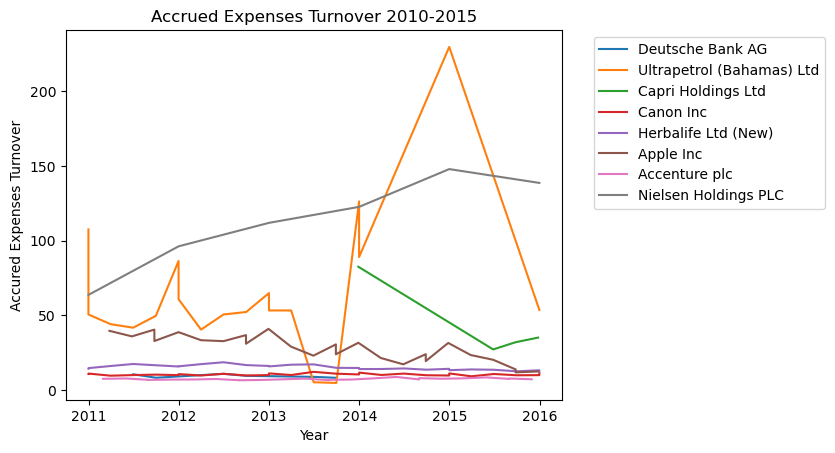

In [26]:
for comp in companies:
    company_data = relevant_data[relevant_data['company_name'] == comp]
    plt.plot(company_data['report_date'], company_data['amount'], label = comp)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Accrued Expenses Turnover 2010-2015')
plt.xlabel('Year')
plt.ylabel('Accured Expenses Turnover')
plt.show()



In the graph above, we able to visualize the financial trends for various companies, highlighting their Accrued Expenses Turnover from 2010 to 2015. The graph depicts each company's financial efficiency, with lines tracing how frequently they managed to pay off their accrued expenses over the six-year period. While some companies show dramatic variances, like UltraPetrol (Bahamas) with a significant spike in 2014, others, like Apple Inc. and Accenture plc, display more stable trends. This visualization allows us to compare and analyze the companies' financial practices and efficiency in managing short-term liabilities during the observed years.

### Geographical Region Analysis
Now let's shift our focus to analyzing data based on geographical regions. This involves grouping data to understand how different regions contribute to the financial metrics.

Understanding the performance of different geographical regions and stock exchanges is crucial in global financial analysis. It allows us to identify which regions are performing well and which may need more attention or investment.

**Geographical Region Analysis**: Grouping data by country and calculating metrics such as the average financial amount enables a deep understanding of regional performance, highlighting disparities and trends across different markets. This method is essential in global financial analysis, offering insights into each region's economic impact and guiding strategic business decisions and resource allocation based on regional strengths and weaknesses

In [27]:
updated_df[['country_name','company_name']].value_counts()

country_name              company_name             
Cayman Islands            Herbalife Ltd (New)          27
Japan                     Canon Inc                    27
Ireland                   Accenture plc                25
United States of America  Apple Inc                    25
Bahamas                   Ultrapetrol (Bahamas) Ltd    19
Germany                   Deutsche Bank AG              6
United States of America  Nielsen Holdings PLC          6
United Kingdom            Capri Holdings Ltd            4
Name: count, dtype: int64

In [28]:
# Grouping data by country and calculating the average of the 'amount'
country_avg = updated_df.groupby('country_name')['amount'].mean()
country_avg

country_name
Bahamas                     66.515369
Cayman Islands              15.060796
Germany                      9.288999
Ireland                      7.264400
Japan                       10.376605
United Kingdom              44.166750
United States of America    44.377585
Name: amount, dtype: float64

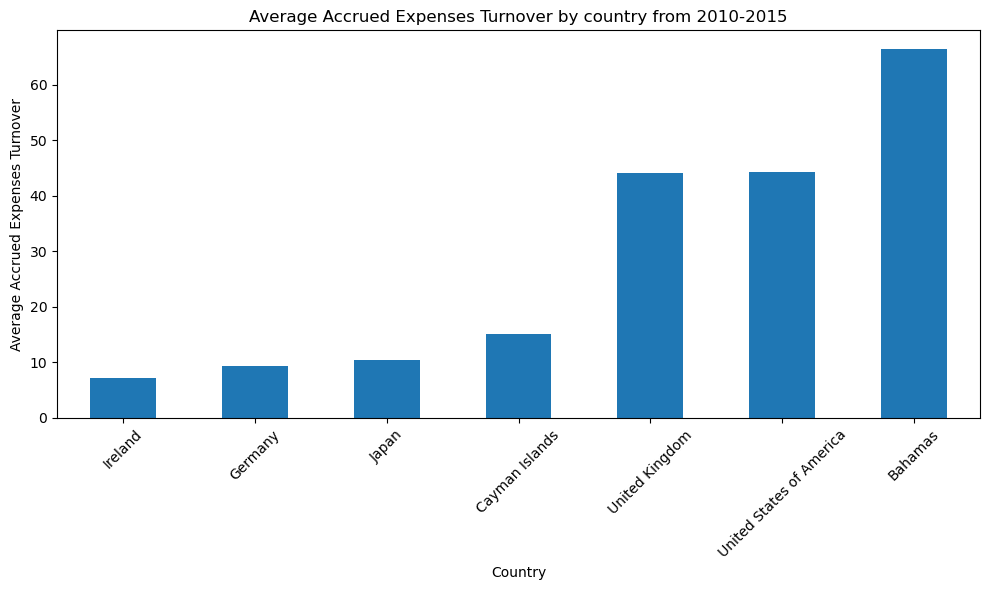

In [29]:
plt.figure(figsize=(10,6))
country_avg.sort_values().plot(kind='bar')
plt.title('Average Accrued Expenses Turnover by country from 2010-2015')
plt.xlabel('Country')
plt.ylabel('Average Accrued Expenses Turnover')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can observe that the metric varies significantly from country to country between 7.2 in Ireland to 66.5 in Bahamas. Ultrapetrol (Bahamas) Ltd had a big spike in 2014 which is causing such a high value for Bahamas. And we have just one or two companies per country in this dataset. So it is not possilbe to comment on the overall economy of the country based on this dataset.

### Comparison across different industries
This will help us compare how different industries fare against each other in various economic conditions.

In [30]:
url = f'https://data.nasdaq.com/api/v3/datatables/MER/F1.json?&qopts.per_page=10000&mapcode=-1802&reportdate.gte=2010-01-01&reportdate.lte=2015-12-31&api_key={api_key}'

response = requests.get(url)



In [31]:
data = response.json()

In [32]:
data = response.json()
df_ind = pd.DataFrame(data['datatable']['data'],columns=col_names)
df_ind.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


In [33]:
df_ind.shape

(306, 32)

In [34]:
df_ind['mic'].value_counts().sort_index()

mic
1.2.2     6
1.6.1    27
1.7.1    27
2.1.5    26
2.2.1    32
5.1.1     6
5.2.1     3
6.1.1    13
6.1.2    64
6.2.1    25
7.3.1    27
7.4.2    19
7.5.2    31
Name: count, dtype: int64

In [35]:
mic_codes = {
    '1.2': 'Food & Beverage',
    '1.6': 'Consumer Goods',
    '1.7': 'Household & Personal Products',
    '2.1': 'Retail',
    '2.2': 'Consumer Services',
    '5.1': 'Banking & Savings',
    '5.2': 'Insurance',
    '6.1': 'Communications',
    '6.2': 'IT Hardware',
    '7.3': 'Electrical Equipment',
    '7.4': 'Transport',
    '7.5': 'Commercial Services & Supplies'
    }


In [36]:
def ind_name(mic_code):
    return mic_codes[mic_code[:3]]

df_ind['industry'] = df_ind['mic'].apply(lambda x: ind_name(x))
df_ind.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement,industry
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings


In [37]:
# Change reportdate column to datetime
df_ind['reportdate'] = pd.to_datetime(df_ind['reportdate'])
df_ind['reportdate'].dtype

dtype('<M8[ns]')

In [38]:
df_ind['indicator'].unique()

array(['Accrued Expenses Turnover'], dtype=object)

In [39]:
df_ind['year']=df_ind['reportdate'].dt.year
df_ind.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement,industry,year
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings,2011
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings,2011
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings,2012
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings,2012
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived,Banking & Savings,2013


###  Understanding Financial Trends across Industries

In [40]:
# Grouping data by industry and calculating the average of the 'amount'
industry_avg = df_ind.groupby(['year','industry'])['amount'].mean().reset_index()
industry_avg.head()

,year,industry,amount
0,2010,Commercial Services & Supplies,63.677019
1,2010,Communications,21.339628
2,2010,Consumer Goods,10.799684
3,2010,Consumer Services,42.060811
4,2010,Electrical Equipment,68.322178


In [41]:
industries = df_ind['industry'].unique().tolist()
industries

['Banking & Savings',
 'Transport',
 'Retail',
 'Consumer Goods',
 'Household & Personal Products',
 'IT Hardware',
 'Commercial Services & Supplies',
 'Consumer Services',
 'Communications',
 'Insurance',
 'Electrical Equipment',
 'Food & Beverage']

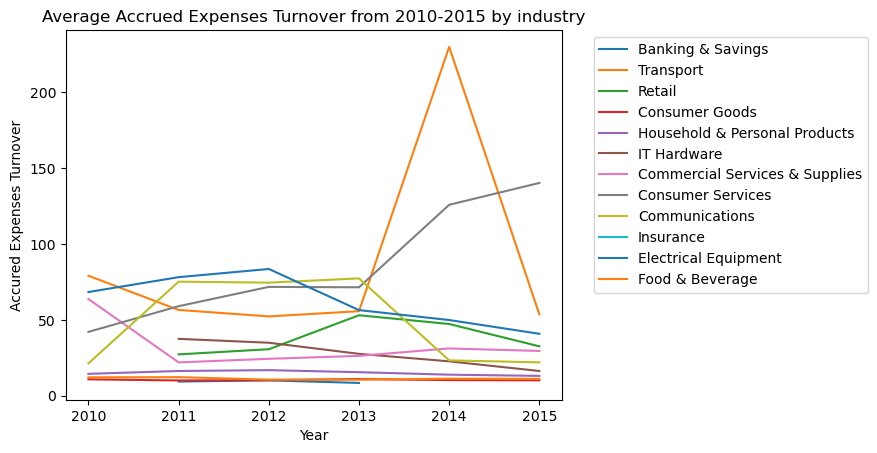

In [42]:
for ind in industries:
    ind_data = industry_avg[industry_avg['industry'] == ind]
    plt.plot(ind_data['year'], ind_data['amount'], label = ind)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Average Accrued Expenses Turnover from 2010-2015 by industry')
plt.xlabel('Year')
plt.ylabel('Accured Expenses Turnover')
plt.show()

In the graph above, we able to visualize the financial trends for various industries, highlighting their Accrued Expenses Turnover from 2010 to 2015. The graph depicts each industry's financial efficiency, with lines tracing how frequently they managed to pay off their accrued expenses over the six-year period. While some industries show dramatic variances, like Transport with a significant spike in 2014, others, like Banking & Savings, Consumer Goods, Food & Beverage display more stable trends. This visualization allows us to compare how well different industries fare against each other in their efficiency in managing short-term liabilities during the observed years.

## Conclusion
We have completed all three goals of this analysis:

1. **Analyzed the financial trend of 'accrued expenses turnover' over a period for various companies**: The average Accrued Expenses Turnover ratio for companies is around 26.91, with a wide range from 4.69 to 229.81. This variation signifies diverse financial management strategies among companies. The standard deviation of 33.10 suggests substantial differences in how companies manage their short-term liabilities, influenced by factors like industry and company size. While some companies show dramatic variances, like UltraPetrol (Bahamas) with a significant spike in 2014, others, like Apple Inc. and Accenture plc, display more stable trends. 

2. **Examined how different regions contribute to this financial metric.**: The average Accrued Expenses Turnover ratio varies significantly from country to country between 7.2 in Ireland to 66.5 in Bahamas. Ultrapetrol (Bahamas) Ltd had a big spike in 2014 which is causing such a high value for Bahamas. Given that we have just one or two companies per country in this dataset, it is not possilbe to comment on the overall economy of the country but it highlights the disparities across different markets and offers insight into the regional strengths and weaknesses.

3. **Compared how different industries fare against each other in terms of this metric**: While some industries show dramatic variances, like Transport with a significant spike in 2014, others, like Banking & Savings, Consumer Goods, Food & Beverage display more stable trends. This visualization allows us to compare how well different industries fare against each other in their efficiency in managing short-term liabilities during the observed years. This information can be used for guiding strategic business decisions and resource allocation.

### Author
Puneet Pawar